In [36]:
import pandas as pd

path_17 = "/Users/pcsishun/project_scg/project_hlr/data/data_2025-8-8.csv"
df_17 = pd.read_csv(path_17)
df = df_17
df = df.drop(columns=['id', 'temp', 'humidity', 'co2'])
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
df['timestamp_thai'] = df['timestamp'].dt.tz_convert('Asia/Bangkok')
df['time_only'] = df['timestamp_thai'].dt.time
start_time = pd.to_datetime("08:35:00").time()
end_time = pd.to_datetime("11:37:00").time()

df['formatted'] = df['timestamp_thai'].dt.strftime('%Y/%m/%d %H:%M:%S')
df = df[(df['time_only'] >= start_time) & (df['time_only'] <= end_time)]

df = df[df['device_name'].isin(['tongdy_3', 'tongdy_4', 'tongdy_2','tongdy_1'])]
df['device_name_label'] = df['device_name_label'].replace({'Carbon inlet': 'CO2 HLR Inlet'})
df = df[df['device_name_label'] == "HLR Exhaust"]
df
pivot_df = df.pivot(index='formatted', columns=['device_name_label'], values='adjust_co2')
pivot_df = pivot_df.reset_index()
pivot_df.columns.name = None
pivot_df = pivot_df.rename(columns={
    'Carbon Outlet': 'CO2 Inlet', 
    'HLR Exhaust': 'Co2 Regen',
    'CO2 HLR Inlet': 'CO2 Inlet-none-use'
})

pivot_df
# pivot_df
# pivot_df['formatted'] = pd.to_datetime(pivot_df['formatted'])
# mean_per_minute = pivot_df 
# mean_per_minute
# pivot_df['minute'] = pivot_df['formatted'].dt.floor('min')
# mean_per_minute = pivot_df.groupby('minute').mean().reset_index()
# mean_per_minute = mean_per_minute.rename(columns={'minute': 'timestamp'})
# mean_per_minute = mean_per_minute.drop(columns=['formatted'])
# mean_per_minute


,formatted,Co2 Regen
0,2025/08/08 08:35:01,460.979702
1,2025/08/08 08:35:31,395.835784
2,2025/08/08 08:36:01,329.568695
3,2025/08/08 08:36:31,320.583327
4,2025/08/08 08:37:01,323.952840
...,...,...
358,2025/08/08 11:34:31,425.038230
359,2025/08/08 11:35:01,422.791888
360,2025/08/08 11:35:31,420.545546
361,2025/08/08 11:36:01,418.299204


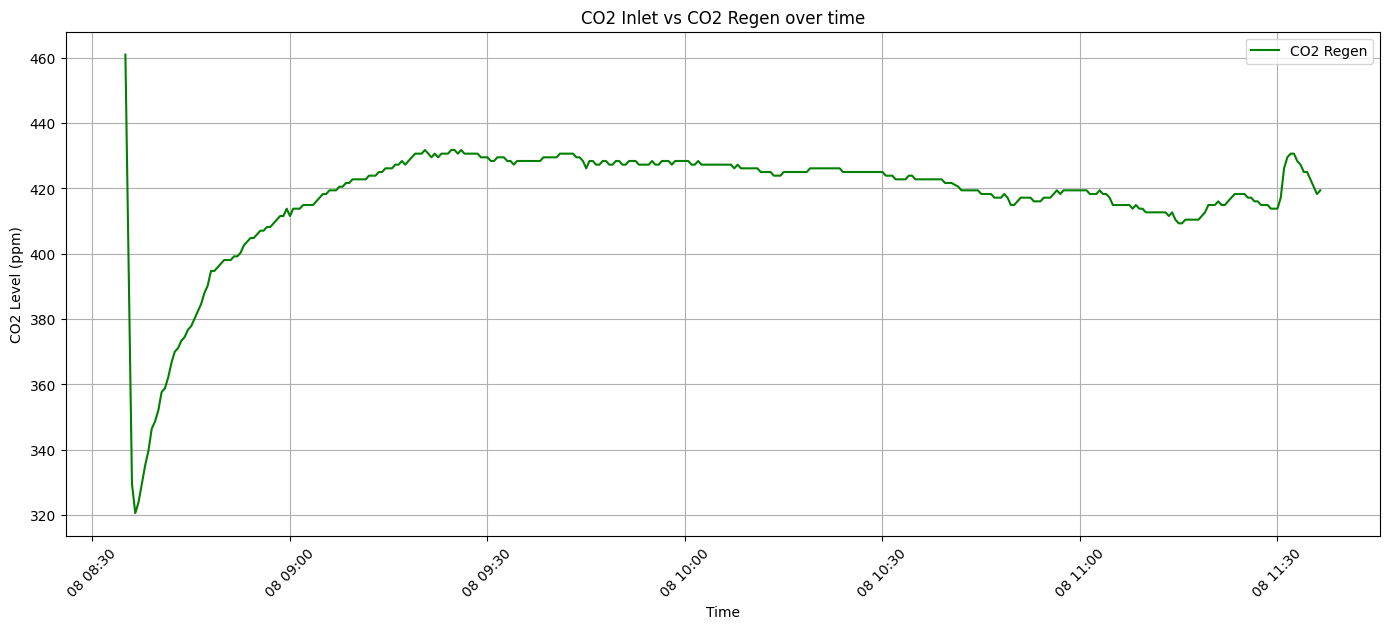

In [37]:
import matplotlib.pyplot as plt

pivot_df['formatted'] = pd.to_datetime(pivot_df['formatted'])
plt.figure(figsize=(14, 6))

# plt.plot(pivot_df['formatted'], pivot_df['CO2 Inlet'], label='CO2 Inlet', color='blue')
plt.plot(pivot_df['formatted'], pivot_df['Co2 Regen'], label='CO2 Regen', color='green')
# plt.plot(pivot_df['formatted'], pivot_df['CO2 Inlet-none-use'], label='CO2 Inlet-none-use', color='red')
# plt.plot(pivot_df['formatted'], pivot_df['HLR intlet'], label='HLR intlet', color='yellow')
plt.xlabel('Time')
plt.ylabel('CO2 Level (ppm)')
plt.title('CO2 Inlet vs CO2 Regen over time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [44]:
import pandas as pd

path_17 = "/Users/pcsishun/project_scg/project_hlr/data/data_2025-8-8.csv"
df_17 = pd.read_csv(path_17)
df = df_17
df = df.drop(columns=['id', 'temp', 'humidity', 'co2'])
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
df['timestamp_thai'] = df['timestamp'].dt.tz_convert('Asia/Bangkok')
df['time_only'] = df['timestamp_thai'].dt.time
start_time = pd.to_datetime("08:35:00").time()
end_time = pd.to_datetime("11:38:00").time()

df['formatted'] = df['timestamp_thai'].dt.strftime('%Y/%m/%d %H:%M:%S')
df = df[(df['time_only'] >= start_time) & (df['time_only'] <= end_time)]

df = df[df['device_name'].isin(['tongdy_3', 'tongdy_4', 'tongdy_2','tongdy_1'])]
df['device_name_label'] = df['device_name_label'].replace({'Carbon inlet': 'CO2 HLR Inlet'})

pivot_df = df.pivot(index='formatted', columns=['device_name_label'], values='adjust_co2')
pivot_df = pivot_df.reset_index()
pivot_df.columns.name = None
pivot_df = pivot_df.rename(columns={
    'Carbon Outlet': 'CO2 Inlet', 
    'HLR Exhaust': 'Co2 Regen',
    'CO2 HLR Inlet': 'CO2 Inlet-none-use'
})


# pivot_df
pivot_df['formatted'] = pd.to_datetime(pivot_df['formatted'])
pivot_df = pivot_df.drop(columns=['CO2 Inlet-none-use', 'HLR intlet'])
# pivot_df
pivot_df['minute'] = pivot_df['formatted'].dt.floor('min')
mean_per_minute = pivot_df.groupby('minute').mean().reset_index()
mean_per_minute = mean_per_minute.rename(columns={'minute': 'timestamp'})
mean_per_minute = mean_per_minute.drop(columns=['formatted'])
mean_per_minute


,timestamp,CO2 Inlet,Co2 Regen
0,2025-08-08 08:35:00,469.930962,428.407743
1,2025-08-08 08:36:00,470.982332,325.076011
2,2025-08-08 08:37:00,471.508017,326.760767
3,2025-08-08 08:38:00,471.508017,337.430892
4,2025-08-08 08:39:00,470.456647,347.539431
...,...,...,...
179,2025-08-08 11:34:00,463.622742,425.038230
180,2025-08-08 11:35:00,460.468632,421.668717
181,2025-08-08 11:36:00,458.891577,418.860790
182,2025-08-08 11:37:00,455.737467,423.353474


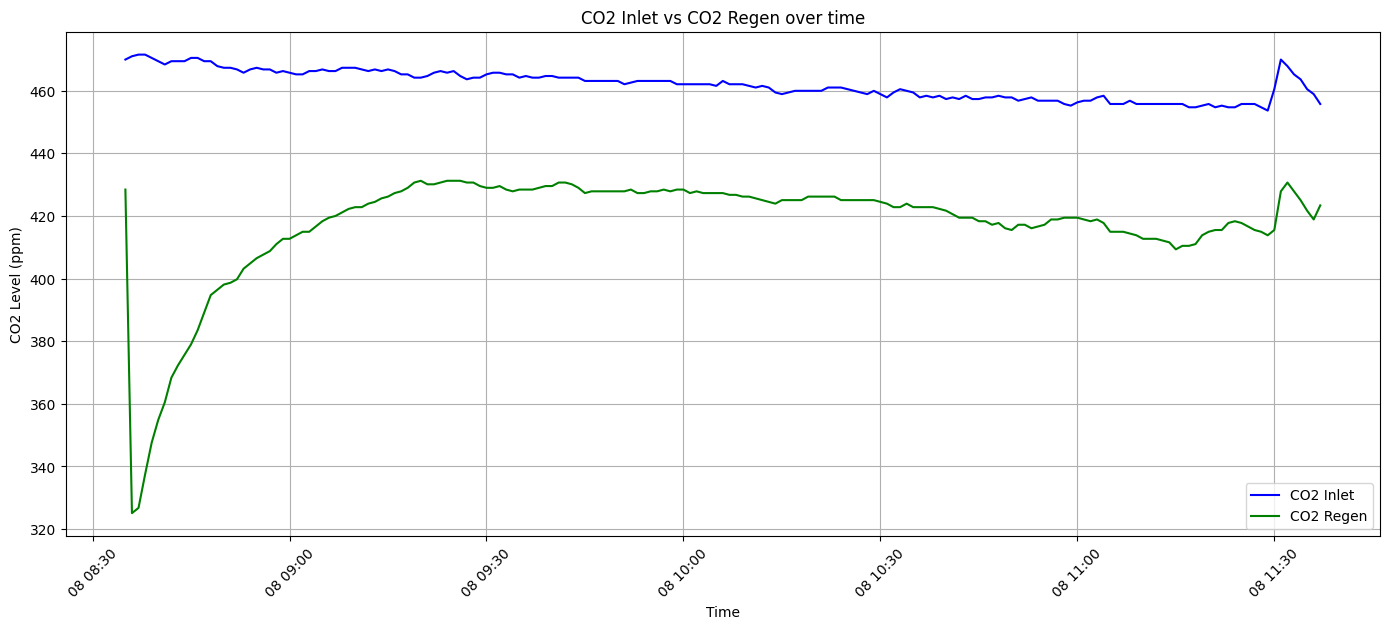

In [45]:
import matplotlib.pyplot as plt

mean_per_minute['timestamp'] = pd.to_datetime(mean_per_minute['timestamp'])
plt.figure(figsize=(14, 6))

plt.plot(mean_per_minute['timestamp'], mean_per_minute['CO2 Inlet'], label='CO2 Inlet', color='blue')
plt.plot(mean_per_minute['timestamp'], mean_per_minute['Co2 Regen'], label='CO2 Regen', color='green')
plt.xlabel('Time')
plt.ylabel('CO2 Level (ppm)')
plt.title('CO2 Inlet vs CO2 Regen over time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [46]:
mean_per_minute.to_csv('hlr_update_adjust_co2_08_08__0835-1136.csv')

In [ ]:
# pivot_df
# pivot_df.to_csv('hlr_test_30_07__0845-1130.csv')

In [23]:
import pandas as pd
# from datetime import datetime

path_17 = "/Users/pcsishun/project_scg/project_hlr/data/data_2025-7-30 (1).csv"
df_17 = pd.read_csv(path_17)


df = df_17

df = df.drop(columns=['id', 'temp', 'humidity', 'co2'])
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
df['timestamp_thai'] = df['timestamp'].dt.tz_convert('Asia/Bangkok')
df['time_only'] = df['timestamp_thai'].dt.time
start_time = pd.to_datetime("15:40:00").time()
end_time = pd.to_datetime("23:59:00").time()

df['formatted'] = df['timestamp_thai'].dt.strftime('%Y/%m/%d %H:%M:%S')
df = df[(df['time_only'] >= start_time) & (df['time_only'] <= end_time)]

df = df[df['device_name'].isin(['tongdy_1'])]
df['device_name_label'] = df['device_name_label'].replace({'HLR intlet': 'CO2 calibrate'})

pivot_df = df.pivot(index='formatted', columns=['device_name_label'], values='adjust_co2')

pivot_df = pivot_df.reset_index()
pivot_df = pivot_df.rename(columns={
    'formatted': 'datetime',
})

pivot_df


device_name_label,datetime,CO2 calibrate
0,2025/07/30 15:40:22,447.063549
1,2025/07/30 15:40:52,447.063549
2,2025/07/30 15:41:22,445.076127
3,2025/07/30 15:41:52,446.069838
4,2025/07/30 15:42:22,445.076127
...,...,...
985,2025/07/30 23:56:53,478.862301
986,2025/07/30 23:57:23,478.862301
987,2025/07/30 23:57:53,479.856012
988,2025/07/30 23:58:23,479.856012


In [24]:

pivot_df['datetime'] = pd.to_datetime(pivot_df['datetime'])

pivot_df['minute'] = pivot_df['datetime'].dt.floor('min')
mean_per_minute = pivot_df.groupby('minute').mean().reset_index()
# mean_per_minute
mean_per_minute = mean_per_minute.rename(columns={'minute': 'timestamp'})
mean_per_minute = mean_per_minute.drop(columns=['datetime'])
mean_per_minute

device_name_label,timestamp,CO2 calibrate
0,2025-07-30 15:40:00,447.063549
1,2025-07-30 15:41:00,445.572982
2,2025-07-30 15:42:00,445.572982
3,2025-07-30 15:43:00,444.579272
4,2025-07-30 15:44:00,443.088705
...,...,...
494,2025-07-30 23:54:00,477.371735
495,2025-07-30 23:55:00,478.862301
496,2025-07-30 23:56:00,478.365445
497,2025-07-30 23:57:00,479.359157


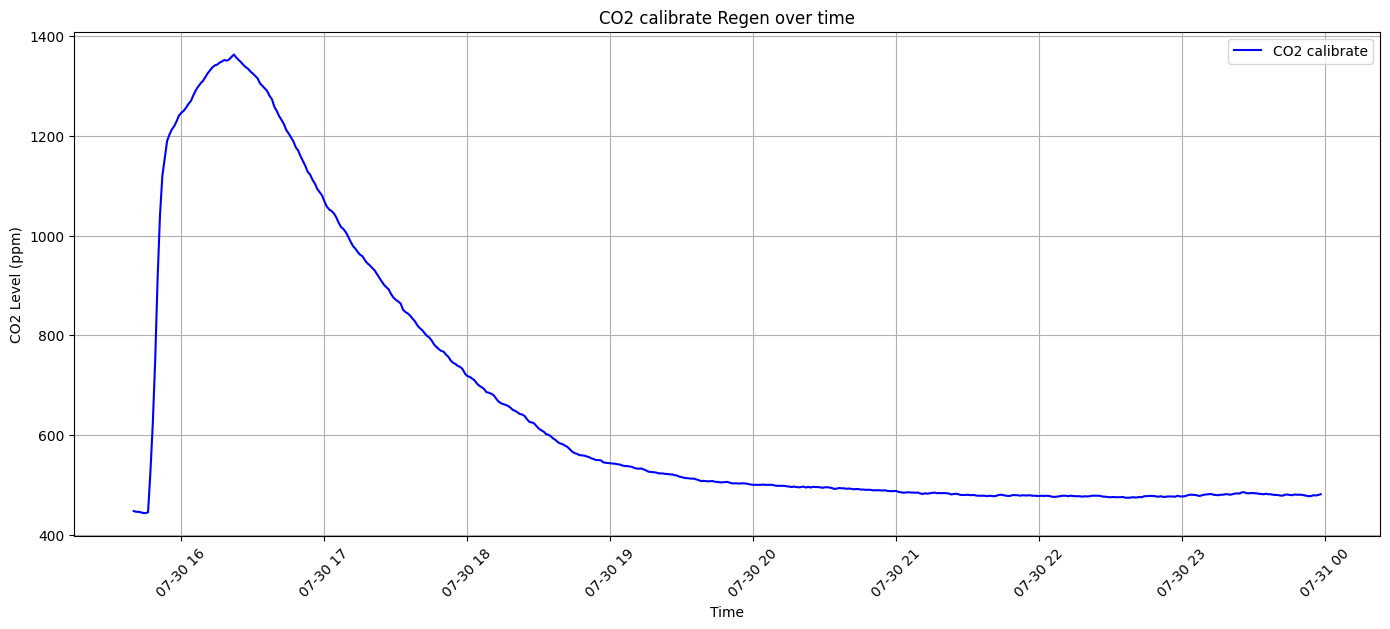

In [27]:
import matplotlib.pyplot as plt

mean_per_minute['timestamp'] = pd.to_datetime(mean_per_minute['timestamp'])
plt.figure(figsize=(14, 6))

plt.plot(mean_per_minute['timestamp'], mean_per_minute['CO2 calibrate'], label='CO2 calibrate', color='blue')
plt.xlabel('Time')
plt.ylabel('CO2 Level (ppm)')
plt.title('CO2 calibrate Regen over time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [25]:
mean_per_minute.to_csv('hlr_adjust_co2_sensor_co2_calibrate_30_07__1540-0000.csv')

# Comparison Temp/Humid

In [44]:
import pandas as pd

# โหลดไฟล์ CSV โดยกำหนดตัวคั่นเป็น ;
df = pd.read_csv('/Users/pcsishun/project_scg/project_hlr/data/line_chart_comparison_temp_humid (1).csv', sep=';')
df_melted = df.melt(
    id_vars=['Timestamp', 'Entity Name'],
    var_name='Metric',
    value_name='Value'
)
df_melted['FullMetric'] = df_melted['Metric'] + ' - ' + df_melted['Entity Name']
df_pivot = df_melted.pivot_table(
    index='Timestamp',
    columns='FullMetric',
    values='Value',
    aggfunc='first'
).reset_index()

df_pivot['Timestamp'] = pd.to_datetime(df_pivot['Timestamp'])

start_time = pd.to_datetime("00:00:00").time()
end_time = pd.to_datetime("23:59:00").time()

# สร้าง filters
date_filter = (df_pivot['Timestamp'].dt.day >= 26) & (df_pivot['Timestamp'].dt.day <= 31)
time_filter = (df_pivot['Timestamp'].dt.time >= start_time) & (df_pivot['Timestamp'].dt.time <= end_time)

# รวมทั้งสองเงื่อนไข
df_selected = df_pivot[date_filter & time_filter]
# df_selected
df_selected = df_selected.set_index('Timestamp')
df_resampled = df_selected.resample('1T').mean()
df_resampled = df_resampled.reset_index()
df_resampled.head(150)


/var/folders/h5/hrfwrxrs5xj4xvb5z20cvyqc0000gn/T/ipykernel_77252/266142769.py:31: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df_selected.resample('1T').mean()


FullMetric,Timestamp,Return_Temp_Competitor - Competitor,Return_Temp_Raycoool - Raycoool,Room_Temp_Competitor - Room temp 1,Room_Temp_Raycoool - Room temp 2,Surface Temp - Competitor - Surface Temp 1,Surface Temp - Raycoool - Surface Temp 2
0,2025-07-26 00:00:00,30.1,29.9,30.0,29.9,31.8,31.8
1,2025-07-26 00:01:00,30.1,29.9,30.0,29.9,31.8,31.8
2,2025-07-26 00:02:00,30.1,29.9,30.0,29.8,31.8,31.8
3,2025-07-26 00:03:00,30.1,29.8,30.0,29.8,31.8,31.8
4,2025-07-26 00:04:00,30.1,29.8,29.9,29.8,31.8,31.8
...,...,...,...,...,...,...,...
145,2025-07-26 02:25:00,29.0,28.7,28.7,28.8,30.8,30.8
146,2025-07-26 02:26:00,28.9,28.7,28.8,28.7,30.7,30.7
147,2025-07-26 02:27:00,28.9,28.7,28.8,28.7,30.7,30.8
148,2025-07-26 02:28:00,28.9,28.7,28.8,28.7,30.7,30.7


In [45]:
df_resampled['diff_return_temp'] = df_resampled['Return_Temp_Competitor - Competitor'] - df_resampled['Return_Temp_Raycoool - Raycoool']
df_resampled['diff_room_temp'] = df_resampled['Room_Temp_Competitor - Room temp 1'] - df_resampled['Room_Temp_Raycoool - Room temp 2']
df_resampled['diff_surface_temp'] = df_resampled['Surface Temp - Competitor - Surface Temp 1'] - df_resampled['Surface Temp - Raycoool - Surface Temp 2']
df_resampled['day'] = df_resampled['day'] = df_resampled['Timestamp'].dt.day

In [46]:
df_resampled_day26 = df_resampled[df_resampled['day'] == 26]
df_resampled_day27 = df_resampled[df_resampled['day'] == 27]
df_resampled_day28 = df_resampled[df_resampled['day'] == 28]
df_resampled_day29 = df_resampled[df_resampled['day'] == 29]
df_resampled_day30 = df_resampled[df_resampled['day'] == 30]
df_resampled_day31 = df_resampled[df_resampled['day'] == 31]
df_resampled = df_resampled[df_resampled['day'].isin([26,27,28,29,30])]


In [47]:
df_resampled[['diff_return_temp', 'diff_room_temp', 'diff_surface_temp']].describe()
# 0.492066	0.254913	1.153034

FullMetric,diff_return_temp,diff_room_temp,diff_surface_temp
count,7193.000000,7191.000000,7186.000000
mean,0.331030,0.135378,0.601545
std,0.303766,0.223028,0.756807
min,-0.400000,-0.500000,-2.600000
25%,0.100000,0.000000,0.000000
50%,0.300000,0.100000,0.200000
75%,0.600000,0.300000,1.200000
max,1.200000,0.800000,2.500000


In [31]:
df_resampled_day26[['diff_return_temp', 'diff_room_temp', 'diff_surface_temp']].describe()

FullMetric,diff_return_temp,diff_room_temp,diff_surface_temp
count,720.000000,720.000000,720.000000
mean,0.587500,0.244861,1.114444
std,0.203473,0.165363,0.485520
min,0.100000,-0.200000,-0.100000
25%,0.500000,0.100000,0.800000
50%,0.600000,0.200000,1.100000
75%,0.700000,0.400000,1.500000
max,1.100000,0.600000,2.100000


In [32]:
df_resampled_day27[['diff_return_temp', 'diff_room_temp', 'diff_surface_temp']].describe()

FullMetric,diff_return_temp,diff_room_temp,diff_surface_temp
count,720.000000,720.000000,720.000000
mean,0.520556,0.268194,1.303611
std,0.221249,0.207112,0.630683
min,0.000000,-0.400000,0.000000
25%,0.400000,0.100000,0.800000
50%,0.600000,0.300000,1.400000
75%,0.700000,0.400000,1.900000
max,0.900000,0.700000,2.300000


In [33]:
df_resampled_day28[['diff_return_temp', 'diff_room_temp', 'diff_surface_temp']].describe()

FullMetric,diff_return_temp,diff_room_temp,diff_surface_temp
count,720.000000,720.000000,720.000000
mean,0.671944,0.310833,1.317917
std,0.297400,0.211082,0.755562
min,-0.200000,-0.300000,-0.500000
25%,0.500000,0.200000,0.700000
50%,0.700000,0.400000,1.500000
75%,0.900000,0.500000,2.000000
max,1.200000,0.700000,2.500000


In [34]:
df_resampled_day29[['diff_return_temp', 'diff_room_temp', 'diff_surface_temp']].describe()
# 0.800000	0.600000	2.400000


FullMetric,diff_return_temp,diff_room_temp,diff_surface_temp
count,720.000000,720.000000,720.000000
mean,0.219444,0.252639,1.150556
std,0.301567,0.200191,0.589689
min,-0.400000,-0.300000,-0.200000
25%,0.000000,0.200000,0.800000
50%,0.200000,0.300000,1.300000
75%,0.500000,0.400000,1.600000
max,0.800000,0.600000,2.400000


In [35]:
df_resampled_day30[['diff_return_temp', 'diff_room_temp', 'diff_surface_temp']].describe()
# 1.000000	0.800000	2.300000


FullMetric,diff_return_temp,diff_room_temp,diff_surface_temp
count,720.000000,720.000000,719.000000
mean,0.428472,0.220833,1.054937
std,0.213541,0.195952,0.744712
min,-0.200000,-0.400000,-2.600000
25%,0.300000,0.100000,0.800000
50%,0.500000,0.200000,1.100000
75%,0.600000,0.300000,1.500000
max,1.000000,0.700000,2.300000


In [64]:
df_diff_data = df_resampled[['Timestamp', 'diff_return_temp', 'diff_room_temp', 'diff_surface_temp']]
# df_diff_data
df_diff_data.to_csv('diff_data_raycool_26_31.csv') 
df_resampled.to_csv('data_comparison_raycool_26_31.csv') 

In [64]:
import pandas as pd 

In [80]:
df = pd.read_csv('/Users/pcsishun/project_scg/project_hlr/data/line_chart_co2__ppm_ (8).csv', sep=';')

df = df.drop(columns=['Entity Name','CO2 Calibrate', 'CO2 Outlet', 'CO2 Regen - Temp adjusted'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['minute'] = df['Timestamp'].dt.floor('min')
df = df.drop(columns=['Timestamp'])

# mean_per_minute = df.drop(columns=['Timestamp'])
df = df.set_index('minute')
df = df.resample('1T').mean()
df = df.reset_index()
df = df.rename(columns={'minute': 'timestamp'})
start_time = pd.to_datetime("08:51:00").time()
end_time = pd.to_datetime("10:55:00").time()
df['time_only'] = df['timestamp'].dt.time
# df
# time_filter = (df['timestamp'].dt.time >= start_time) & (df['timestamp'].dt.time <= end_time)
df = df[(df['time_only'] >= start_time) & (df['time_only'] <= end_time)]
df = df.drop(columns=['time_only'])
df

/var/folders/h5/hrfwrxrs5xj4xvb5z20cvyqc0000gn/T/ipykernel_77252/1467736408.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df = df.resample('1T').mean()


,timestamp,CO2 Inlet,CO2 Regen
30,2025-08-01 08:51:00,427.069689,376.180292
31,2025-08-01 08:52:00,424.927911,400.328468
32,2025-08-01 08:53:00,1078.884127,383.855293
33,2025-08-01 08:54:00,2045.718412,655.288285
34,2025-08-01 08:55:00,2211.884689,859.331017
...,...,...,...
150,2025-08-01 10:51:00,2218.666986,2136.189248
151,2025-08-01 10:52:00,2218.666986,2137.031627
152,2025-08-01 10:53:00,2219.737875,2138.997176
153,2025-08-01 10:54:00,2219.737875,2140.120347


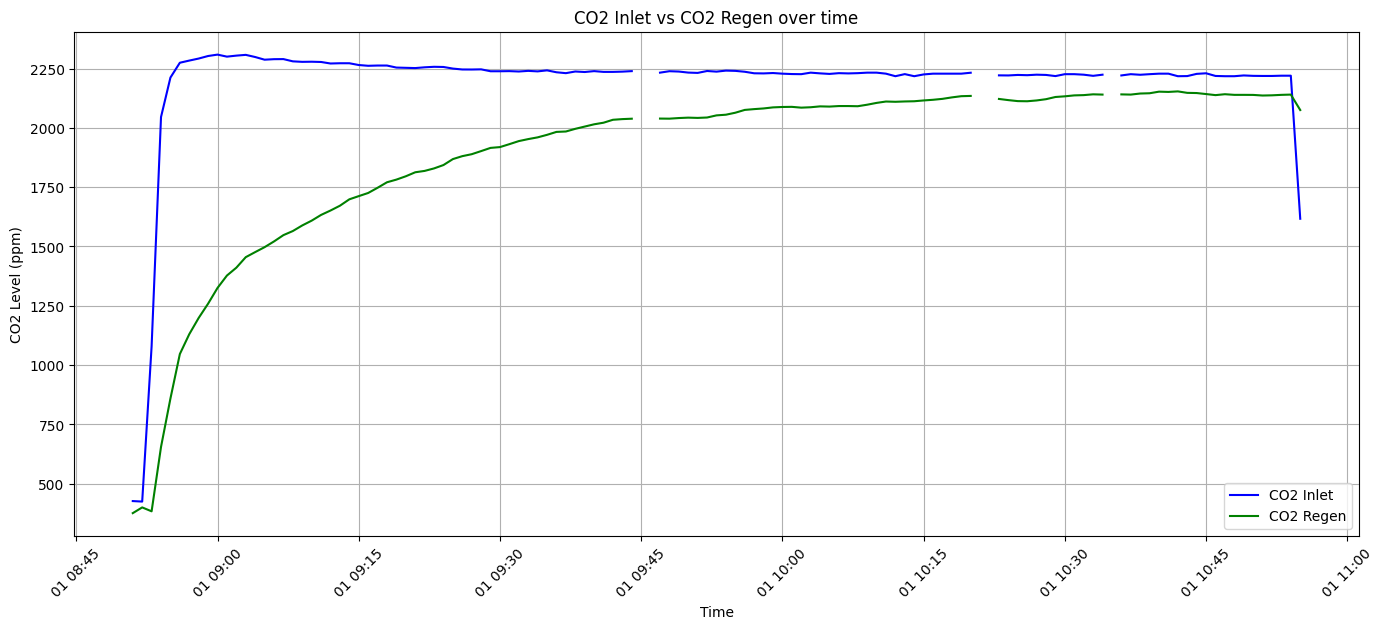

In [85]:
import matplotlib.pyplot as plt

df['timestamp'] = pd.to_datetime(df['timestamp'])
plt.figure(figsize=(14, 6))

plt.plot(df['timestamp'], df['CO2 Inlet'], label='CO2 Inlet', color='blue')
plt.plot(df['timestamp'], df['CO2 Regen'], label='CO2 Regen', color='green')
plt.xlabel('Time')
plt.ylabel('CO2 Level (ppm)')
plt.title('CO2 Inlet vs CO2 Regen over time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [86]:
df.to_csv('hlr_adjust_co2_01_08__0851-1054.csv')